<a href="https://colab.research.google.com/github/GagraniV/WiDS2023/blob/main/VJ_WiDS_Jan132023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install pytorch-tabnet
#!pip install wget
#!pip install wandb
#import wandb
#!pip install optuna
#from pytorch_tabnet.tab_model import TabNetRegressor
#import optuna
#from optuna import Trial, visualization
#import torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 KB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 7.5 MB/s eta 0:00:00


In [1]:
import numpy as np 
import pandas as pd 
from random import random
import csv
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
plt.style.use('ggplot')
import seaborn as sns
from datetime import datetime
from scipy import stats

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Download complete and/or subset of the dataset. 
Upload dataset https://towardsdatascience.com/7-ways-to-load-external-data-into-google-colab-7ba73e7d5fc7


In [ ]:
trn_df= pd.read_csv('/content/drive/MyDrive/Kaggle2023/train_data.csv')
tst_df= pd.read_csv('/content/drive/MyDrive/Kaggle2023/test_data.csv')

In [ ]:
trn_df= pd.read_csv('/content/drive/MyDrive/Kaggle2023/train_data.csv',nrows =1000)
tst_df= pd.read_csv('/content/drive/MyDrive/Kaggle2023/test_data.csv',nrows =1000)

In [2]:
np.random.seed(222)
trn_df= pd.read_csv('/content/drive/MyDrive/Kaggle2023/train_data.csv', skiprows=lambda x: x > 0 and random() >=0.05)
tst_df= pd.read_csv('/content/drive/MyDrive/Kaggle2023/test_data.csv', skiprows=lambda x: x > 0 and random() >=0.05)

In [ ]:
with open('/content/drive/MyDrive/Kaggle2023/train_data.csv', 'r') as fin:
    reader = csv.reader(fin)
    rows = [l for l in reader if random() >= 0.99]
    trn_df = pd.DataFrame(rows)

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#to unmount
drive.flush_and_unmount()

In [ ]:
%cd drive/MyDrive/Kaggle2023
#trn_df= pd.read_csv('train_data.csv')

/content/drive/MyDrive/Kaggle2023


In [3]:
display(trn_df.head(n=5).style.set_caption('Train data'))

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-tmp2m-14d__tmp2m,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,climateregions__climateregion,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010

In [4]:
trn_df.filter(regex='^contest',axis=1).head()

,contest-pevpr-sfc-gauss-14d__pevpr,contest-wind-h10-14d__wind-hgt-10,contest-rhum-sig995-14d__rhum,contest-wind-h100-14d__wind-hgt-100,contest-tmp2m-14d__tmp2m,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500
0,164.24,30927.77,72.08,16461.91,17.437097,101941.27,3.82,99185.18,29.96,17.61,2.52,31.25,1542.37,-0.73,5817.74
1,162.15,30927.78,73.74,16466.05,17.554885,101890.55,3.93,99146.33,28.05,18.07,1.15,31.37,1540.42,-0.82,5820.95
2,144.30,30794.32,77.39,16437.34,16.766682,101524.46,3.15,98804.11,32.69,21.33,16.18,2.69,1507.86,0.44,5775.40
3,294.81,30908.56,79.39,16498.49,24.614053,101389.01,6.38,98655.70,27.88,31.08,1.39,34.34,1525.46,-3.89,5857.72
4,202.19,30978.83,83.07,16488.43,23.695174,101199.29,3.50,98466.66,36.76,34.75,7.58,79.43,1508.85,-2.60,5822.96


In [5]:
#file containing most recent monthly temprature NMME model forecasts for tmp2m 
trn_df.filter(regex = '^nmme0-tmp2m',axis=1).head(n =6)

,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean
0,22.82,26.38,23.98,25.98,22.77,24.63,23.83,19.61,23.81,23.76
1,22.82,26.38,23.98,25.98,22.77,24.63,23.83,19.61,23.81,23.76
2,16.91,21.65,13.72,18.87,18.18,19.16,18.64,16.45,19.87,18.16
3,17.29,19.99,17.44,16.49,16.62,16.88,16.96,16.08,18.64,17.38
4,17.29,19.99,17.44,16.49,16.62,16.88,16.96,16.08,18.64,17.38
5,22.04,26.17,20.49,23.03,21.92,22.74,22.76,22.82,23.24,22.80


In [6]:
trn_df.filter(regex = '^cancm30',axis=1).head(n =6)

,cancm30
0,22.82
1,22.82
2,16.91
3,11.51
4,17.29
5,22.04


In [7]:
print('Column count is: ', len(trn_df.columns))

Column count is:  246


In [8]:
print('Row count is:', len(trn_df))

Row count is: 18636


In [13]:
print('train rows and column: ', trn_df.shape)
print('test rows and column: ', tst_df.shape)

train rows and column:  (18636, 246)
test rows and column:  (1571, 245)


In [10]:
trn_df.columns

Index(['index', 'lat', 'lon', 'startdate',
       'contest-pevpr-sfc-gauss-14d__pevpr', 'nmme0-tmp2m-34w__cancm30',
       'nmme0-tmp2m-34w__cancm40', 'nmme0-tmp2m-34w__ccsm30',
       'nmme0-tmp2m-34w__ccsm40', 'nmme0-tmp2m-34w__cfsv20',
       ...
       'wind-vwnd-925-2010-11', 'wind-vwnd-925-2010-12',
       'wind-vwnd-925-2010-13', 'wind-vwnd-925-2010-14',
       'wind-vwnd-925-2010-15', 'wind-vwnd-925-2010-16',
       'wind-vwnd-925-2010-17', 'wind-vwnd-925-2010-18',
       'wind-vwnd-925-2010-19', 'wind-vwnd-925-2010-20'],
      dtype='object', length=246)

In [ ]:
tst_df.columns

Index(['index', 'lat', 'lon', 'startdate',
       'contest-pevpr-sfc-gauss-14d__pevpr', 'nmme0-tmp2m-34w__cancm30',
       'nmme0-tmp2m-34w__cancm40', 'nmme0-tmp2m-34w__ccsm30',
       'nmme0-tmp2m-34w__ccsm40', 'nmme0-tmp2m-34w__cfsv20',
       ...
       'wind-vwnd-925-2010-11', 'wind-vwnd-925-2010-12',
       'wind-vwnd-925-2010-13', 'wind-vwnd-925-2010-14',
       'wind-vwnd-925-2010-15', 'wind-vwnd-925-2010-16',
       'wind-vwnd-925-2010-17', 'wind-vwnd-925-2010-18',
       'wind-vwnd-925-2010-19', 'wind-vwnd-925-2010-20'],
      dtype='object', length=245)

In [14]:
trn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18636 entries, 0 to 18635
Columns: 246 entries, index to wind-vwnd-925-2010-20
dtypes: float64(240), int64(4), object(2)
memory usage: 35.0+ MB


In [15]:
tst_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1571 entries, 0 to 1570
Columns: 245 entries, index to wind-vwnd-925-2010-20
dtypes: float64(241), int64(2), object(2)
memory usage: 2.9+ MB


https://www.kaggle.com/competitions/widsdatathon2023/data

In [ ]:
trn_df.dtypes

index                                         int64
lat                                         float64
lon                                         float64
startdate                                    object
contest-pevpr-sfc-gauss-14d__pevpr          float64
nmme0-tmp2m-34w__cancm30                    float64
nmme0-tmp2m-34w__cancm40                    float64
nmme0-tmp2m-34w__ccsm30                     float64
nmme0-tmp2m-34w__ccsm40                     float64
nmme0-tmp2m-34w__cfsv20                     float64
nmme0-tmp2m-34w__gfdlflora0                 float64
nmme0-tmp2m-34w__gfdlflorb0                 float64
nmme0-tmp2m-34w__gfdl0                      float64
nmme0-tmp2m-34w__nasa0                      float64
nmme0-tmp2m-34w__nmme0mean                  float64
contest-wind-h10-14d__wind-hgt-10           float64
nmme-tmp2m-56w__cancm3                      float64
nmme-tmp2m-56w__cancm4                      float64
nmme-tmp2m-56w__ccsm3                       float64
nmme-tmp2m-5

In [16]:
tst_df.describe()

,index,lat,lon,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010-5,wind-uwnd-925-2010-6,wind-uwnd-925-2010-7,wind-uwnd-925-2010-8

In [17]:
list(trn_df.select_dtypes(include='object'))

['startdate', 'climateregions__climateregion']

In [18]:
list(trn_df.select_dtypes(include='int64'))

['index', 'mjo1d__phase', 'mei__meirank', 'mei__nip']

In [19]:
trn_df.columns.to_series().groupby(trn_df.dtypes).count()

int64        4
float64    240
object       2
dtype: int64

In [20]:
#Object type columns 
trn_df.groupby(['climateregions__climateregion'])['startdate'].count().reset_index()


,climateregions__climateregion,startdate
0,BSh,270
1,BSk,6992
2,BWh,444
3,BWk,685
4,Cfa,2533
5,Cfb,216
6,Csa,499
7,Csb,2033
8,Dfa,1118
9,Dfb,2517


In [22]:
#countplot_features(trn_df, feature='climateregions__climateregion', title = "Frequency of "+ feature)

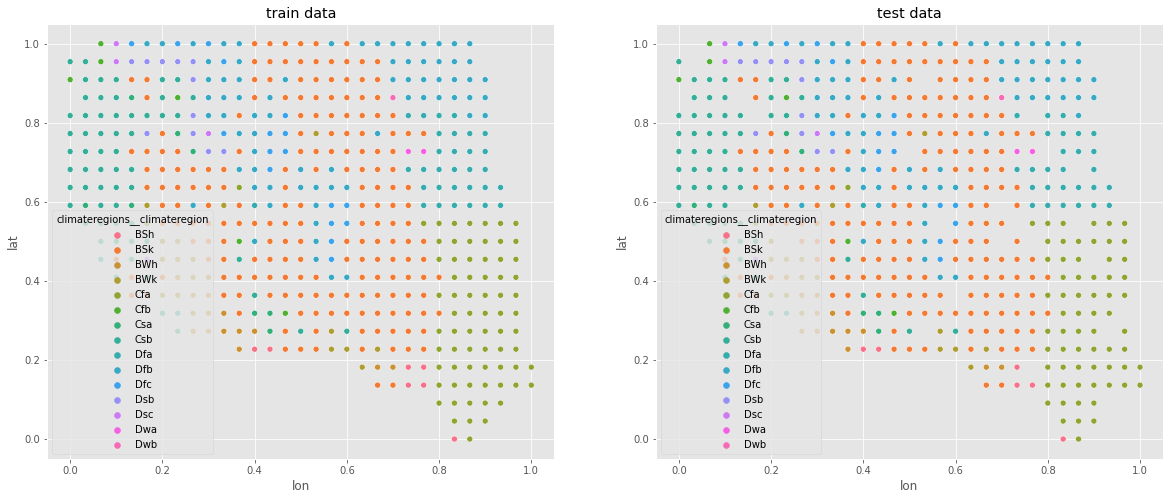

In [23]:
temp = trn_df.groupby(['climateregions__climateregion', 'lat', 'lon']).size().to_frame().reset_index(drop=False)
fig, ax = plt.subplots(1,2, figsize=(20,8))
sns.scatterplot(data=temp, y='lat', x='lon', hue='climateregions__climateregion', ax=ax[0])
ax[0].set_title('train data')
temp = tst_df.groupby(['climateregions__climateregion', 'lat', 'lon']).size().to_frame().reset_index(drop=False)
sns.scatterplot(data=temp, y='lat', x='lon', hue='climateregions__climateregion', ax=ax[1])
ax[1].set_title('test data')
plt.show()

In [30]:
#Let's create a location feature from the lat/lon coordinates.
# Concatenate train and test data
all_df = pd.concat([trn_df, tst_df], axis=0)

# Create new feature
all_df['loc_group'] = all_df.groupby(['lat','lon']).ngroup()
display(all_df)

print(f'{all_df.loc_group.nunique()} unique locations')

# Split back up
trn_df = all_df.iloc[:len(trn_df)]
tst_df = all_df.iloc[len(trn_df):]

In [33]:
#all_df.groupby(['loc_group'])['lat'].count()
all_df.loc_group.unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        71,  72,  73,  74,  76,  77,  78,  79,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
       112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124,
       125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137,
       138, 139, 140, 141, 142, 143, 144, 145, 171, 172, 173, 174, 175,
       176, 177, 178, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189,
       190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202,
       203, 204, 205, 206, 207, 209, 210, 211, 212, 213, 214, 215, 216,
       217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 22

In [27]:
#convert into pandas datetime object
trn_df.startdate = pd.to_datetime(trn_df.startdate)
tst_df.startdate = pd.to_datetime(tst_df.startdate)
trn_df.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-tmp2m-14d__tmp2m,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,climateregions__climateregion,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010

In [28]:
# StartDate
print(min(trn_df.startdate), max(trn_df.startdate))

2014-09-01 00:00:00 2016-08-31 00:00:00


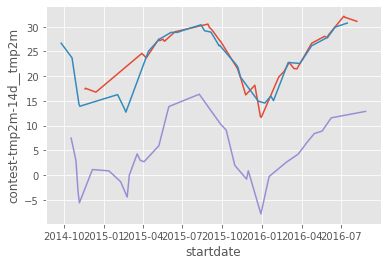

In [36]:
temp = trn_df[trn_df.loc_group == 0]
sns.lineplot(data=temp, x = 'startdate', y = 'contest-tmp2m-14d__tmp2m')
temp = trn_df[trn_df.loc_group == 1]
sns.lineplot(data=temp, x = 'startdate', y = 'contest-tmp2m-14d__tmp2m')

temp = trn_df[trn_df.loc_group == 556]
sns.lineplot(data=temp, x = 'startdate', y = 'contest-tmp2m-14d__tmp2m')

In [37]:
trn_df.describe().style.background_gradient(cmap="Pastel1")

In [38]:
missing_columns = [col for col in trn_df.columns if trn_df[col].isnull().any()]
missingvalues_count =trn_df.isna().sum()
missingValues_df = pd.DataFrame(missingvalues_count.rename('Null Values Count')).loc[missingvalues_count.ne(0)]
missingValues_df.style.background_gradient(cmap="Pastel1")

,Null Values Count
nmme0-tmp2m-34w__ccsm30,842
nmme-tmp2m-56w__ccsm3,540
nmme-prate-34w__ccsm3,460
nmme0-prate-56w__ccsm30,817
nmme0-prate-34w__ccsm30,842
nmme-prate-56w__ccsm3,540
nmme-tmp2m-34w__ccsm3,460
ccsm30,817


In [39]:
trn_df = trn_df.dropna()

In [ ]:
#group start_date by month and check averages of the other columns
#trn_df.groupby(pd.Grouper(key='startdate',freq='M')).mean()

contest-tmp2m-14d__tmp2m, the arithmetic mean of the max and min observed temperature over the next 14 days for each location and start date, is provided

In [ ]:
# Set up train and test DataFrames
# separate tmp2m, the target variable from the features
x_trn = trn_df.drop(['contest-tmp2m-14d__tmp2m'], axis=1) 
y_trn = trn_df['contest-tmp2m-14d__tmp2m']

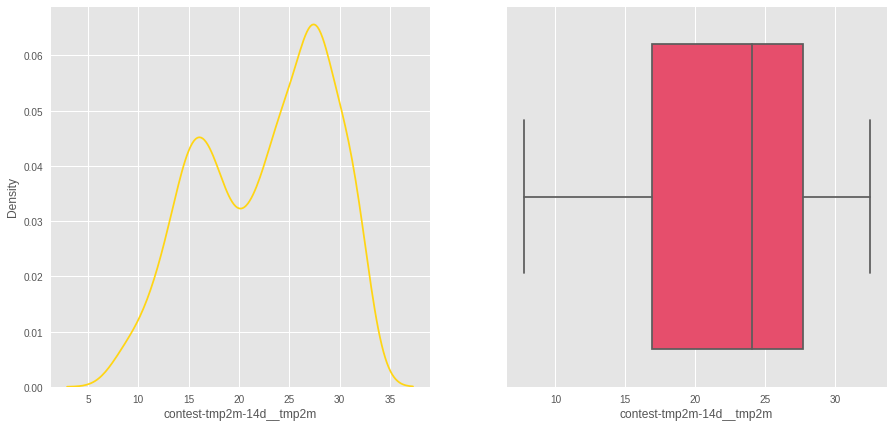

In [ ]:
plt.figure(figsize=(15, 7))
plt.subplot(121)
sns.kdeplot(trn_df['contest-tmp2m-14d__tmp2m'] , color = "#ffd514")
plt.subplot(122)
sns.boxplot(trn_df['contest-tmp2m-14d__tmp2m'] , color = "#ff355d")

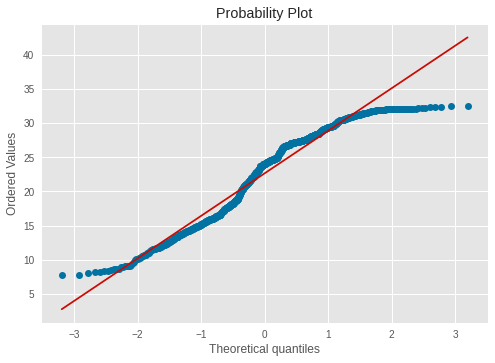

In [ ]:
res = stats.probplot(trn_df['contest-tmp2m-14d__tmp2m'], plot=plt)

In [ ]:
def kdeplot_features(train_df,test_df, feature, title):
    '''Takes a column from the dataframe and plots the distribution (after count).'''
    
    values_train = train_df[feature].to_numpy()
    values_test = test_df[feature].to_numpy()  
     
    plt.figure(figsize = (18, 3))
    
    sns.kdeplot(values_train, color = '#ffd514')
    sns.kdeplot(values_test, color = '#ff355d')
    
    plt.title(title, fontsize=15)
    plt.legend()
    plt.show();
    
    del values_train , values_test
    #gc.collect()
    
def countplot_features(train_df, feature, title):
    '''Takes a column from the dataframe and plots the distribution (after count).'''
    
           
    plt.figure(figsize = (10, 5))
    
    sns.countplot(trn_df[feature], color = '#ff355d')
        
    plt.title(title, fontsize=15)    
    plt.show();


In [ ]:
numerical_features = ['nmme0-tmp2m-34w__nasa0', 'nmme-tmp2m-56w__cancm3', 'nmme-tmp2m-56w__gfdlflorb','nmme-prate-34w__cancm4','nmme-prate-34w__gfdlflora']

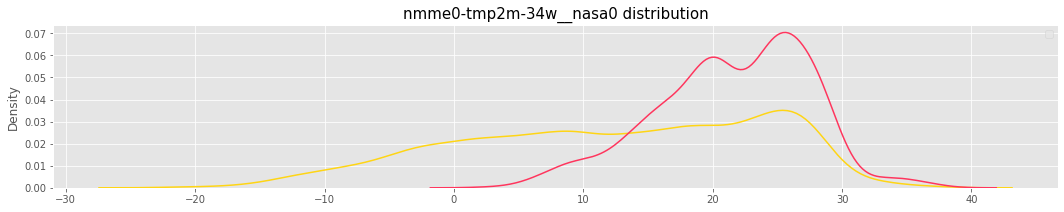

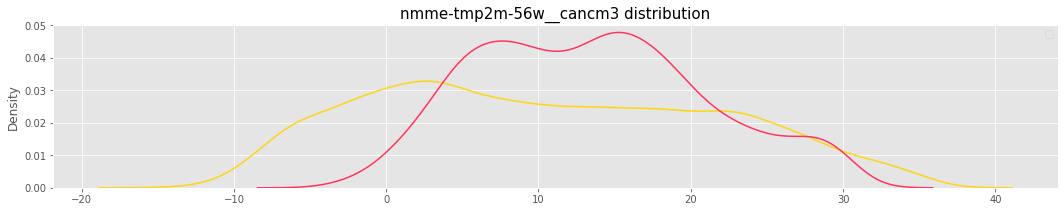

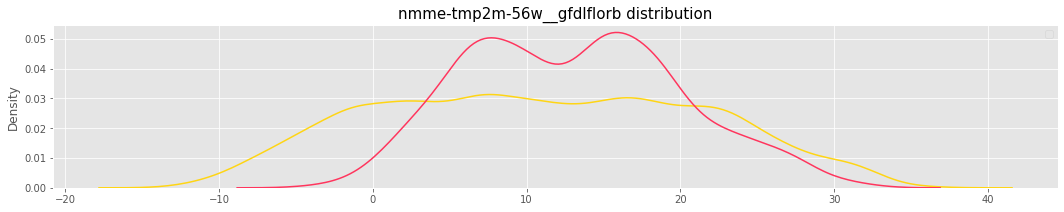

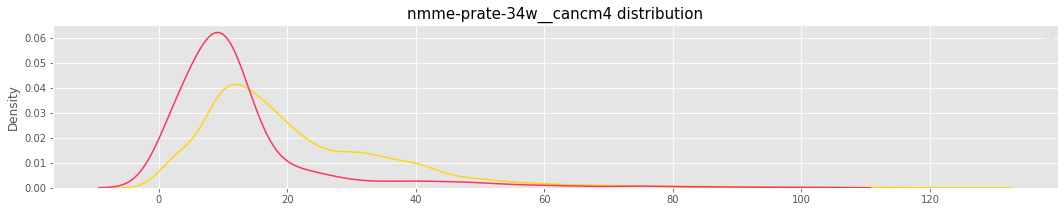

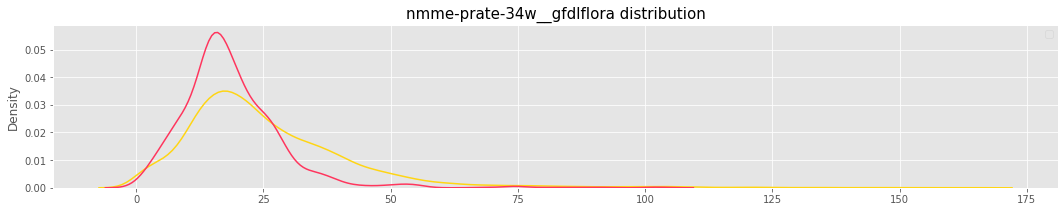

In [ ]:
for feature in numerical_features:
    kdeplot_features(trn_df,tst_df, feature=feature, title = feature + " distribution")

Feature Engineering

In [ ]:
trn_df['year']=pd.DatetimeIndex(trn_df['startdate']).year 
trn_df['month']=pd.DatetimeIndex(trn_df['startdate']).month 
trn_df['day']=pd.DatetimeIndex(trn_df['startdate']).day

tst_df['year']=pd.DatetimeIndex(tst_df['startdate']).year 
tst_df['month']=pd.DatetimeIndex(tst_df['startdate']).month 
tst_df['day']=pd.DatetimeIndex(tst_df['startdate']).day

# drop the startdate column from training and test dataset

trn_df=trn_df.drop(['startdate'], axis=1)
trn_df=trn_df.drop(['index'], axis=1)

tst_df=tst_df.drop(['startdate'], axis=1)
tst_df=tst_df.drop(['index'], axis=1)

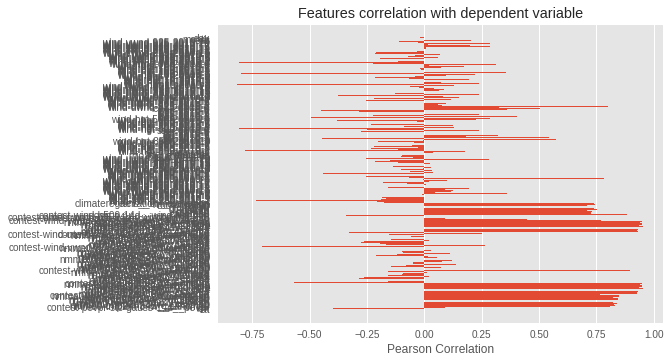

In [ ]:
from yellowbrick.target import FeatureCorrelation
le = LabelEncoder()
trn_df['climateregions__climateregion'] = le.fit_transform(trn_df['climateregions__climateregion'])
tst_df['climateregions__climateregion'] = le.transform(tst_df['climateregions__climateregion'])

X1 = trn_df.drop(columns=['contest-tmp2m-14d__tmp2m'])
y1 = trn_df['contest-tmp2m-14d__tmp2m']

# Create a list of the feature names
features = np.array(X1.columns)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

visualizer.fit(X1, y1)        
visualizer.show()

In [ ]:
def Objective(trial):
    mask_type = trial.suggest_categorical("mask_type", ["entmax", "sparsemax"])
    n_da = trial.suggest_int("n_da", 56, 64, step=4)
    n_steps = trial.suggest_int("n_steps", 1, 3, step=1)
    gamma = trial.suggest_float("gamma", 1., 1.4, step=0.2)
    n_shared = trial.suggest_int("n_shared", 1, 3)
    lambda_sparse = trial.suggest_float("lambda_sparse", 1e-6, 1e-3, log=True)
    tabnet_params = dict(n_d=n_da, n_a=n_da, n_steps=n_steps, gamma=gamma,
                     lambda_sparse=lambda_sparse, optimizer_fn=torch.optim.Adam,
                     optimizer_params=dict(lr=2e-2, weight_decay=1e-5),
                     mask_type=mask_type, n_shared=n_shared,
                     scheduler_params=dict(mode="min",
                                           patience=trial.suggest_int("patienceScheduler",low=3,high=10), # changing sheduler patience to be lower than early stopping patience 
                                           min_lr=1e-5,
                                           factor=0.5,),
                     scheduler_fn=torch.optim.lr_scheduler.ReduceLROnPlateau,
                     verbose=0,
                     ) #early stopping
    kf = KFold(n_splits=5, random_state=42, shuffle=True)
    CV_score_array    =[]
    for train_index, test_index in kf.split(X):
        X_train, X_valid = X[train_index], X[test_index]
        y_train, y_valid = y[train_index], y[test_index]
        regressor = TabNetRegressor(**tabnet_params)
        regressor.fit(X_train=X_train, y_train=y_train,
                  eval_set=[(X_valid, y_valid)],
                  patience=trial.suggest_int("patience",low=15,high=30), max_epochs=trial.suggest_int('epochs', 1, 100),
                  eval_metric=['rmse'])
        CV_score_array.append(regressor.best_cost)
    avg = np.mean(CV_score_array)
    return avg

In [ ]:
study = optuna.create_study(direction="minimize", study_name='TabNet optimization')
study.optimize(Objective, timeout=6*60) #5 hour

[I 2023-01-28 23:34:21,705] A new study created in memory with name: TabNet optimization


Stop training because you reached max_epochs = 26 with best_epoch = 25 and best_val_0_rmse = 4.89971
Stop training because you reached max_epochs = 26 with best_epoch = 10 and best_val_0_rmse = 5.11105
Stop training because you reached max_epochs = 26 with best_epoch = 25 and best_val_0_rmse = 4.01886
Stop training because you reached max_epochs = 26 with best_epoch = 22 and best_val_0_rmse = 4.3347
Stop training because you reached max_epochs = 26 with best_epoch = 23 and best_val_0_rmse = 4.6461


[I 2023-01-28 23:43:22,363] Trial 0 finished with value: 4.602082881666131 and parameters: {'mask_type': 'entmax', 'n_da': 56, 'n_steps': 2, 'gamma': 1.4, 'n_shared': 3, 'lambda_sparse': 4.9369715055997686e-06, 'patienceScheduler': 5, 'patience': 17, 'epochs': 26}. Best is trial 0 with value: 4.602082881666131.


In [ ]:
print(study.best_params)
TabNet_params = study.best_params

In [ ]:
final_params = dict(n_d=TabNet_params['n_da'], n_a=TabNet_params['n_da'], n_steps=TabNet_params['n_steps'], gamma=TabNet_params['gamma'],
                     lambda_sparse=TabNet_params['lambda_sparse'], optimizer_fn=torch.optim.Adam,
                     optimizer_params=dict(lr=2e-2, weight_decay=1e-5),
                     mask_type=TabNet_params['mask_type'], n_shared=TabNet_params['n_shared'],
                     scheduler_params=dict(mode="min",
                                           patience=TabNet_params['patienceScheduler'],
                                           min_lr=1e-5,
                                           factor=0.5,),
                     scheduler_fn=torch.optim.lr_scheduler.ReduceLROnPlateau,
                     verbose=0,
                     )
epochs = TabNet_params['epochs']

In [ ]:
regressor = TabNetRegressor(**final_params)
regressor.fit(X_train=X, y_train=y,
          patience=TabNet_params['patience'], max_epochs=epochs,
          eval_metric=['rmse'])

In [ ]:
submission = pd.read_csv('/kaggle/input/widsdatathon2023/sample_solution.csv')
submission['contest-tmp2m-14d__tmp2m'] = regressor.predict(test.values)
submission.to_csv('submission',index = False)

In [ ]:
# check unique locations provided in the dataset

unique_trn_loc = trn_df.groupby(['lat', 'lon']).size().rename('count').reset_index()
unique_trn_loc.head()

,lat,lon,count
0,0.000000,0.833333,731
1,0.000000,0.866667,731
2,0.045455,0.833333,731
3,0.045455,0.866667,731
4,0.045455,0.900000,731


In [ ]:
# 514 unique location in the dataset
len(unique_trn_loc)

514

In [ ]:
unique_tst_loc = tst_df.groupby(['lat', 'lon']).size().rename('count').reset_index()
unique_tst_loc.head()

,lat,lon,count
0,0.000000,0.833333,61
1,0.000000,0.866667,61
2,0.045455,0.833333,61
3,0.045455,0.866667,61
4,0.045455,0.900000,61


In [ ]:
len(unique_tst_loc)

514

Location Feature and issue

In [ ]:
# Concatenate train and test data
all_df = pd.concat([trn_df, tst_df], axis=0)

# Create new feature
all_df['loc_group'] = all_df.groupby(['lat','lon']).ngroup()

print(f'{all_df.loc_group.nunique()} unique locations')

# Split back up
trn_df_loc = all_df.iloc[:len(trn_df)]
tst_df_loc = all_df.iloc[len(tst_df):]

575 unique locations
